<a href="https://colab.research.google.com/github/LuizJoca/Imers-o-Dados-Alura/blob/main/Imers%C3%A3o_Dados_Alura_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 02

Olá!

Seja bem vindo e bem vinda a aula 02!

Na aula 01, nós começamos a explorar um conjunto de dados relacionados à industria farmacêutica. Para isso nós utilizamos uma biblioteca muito conhecida no mundo de DataScience: o Pandas.

Nós utilizamos o Pandas para abrir o dataset, que estava no formato CSV, e para gerar um dataframe, uma tabela, para então começarmos a analisar e entender o que significava cada coluna. Com a ajuda da Vanessa, especialista na área, identificamos que temos colunas que nos remetem a dados que estão sob tratamento(droga) e com controle. Além disso, temos também diversas colunas que remetem aos genes.

Começamos nossa análise olhando para cada coluna de forma separada e também geramos gráficos, para auxiliar nossa análise.

E você? Como se saiu na resolução dos desafios?

Agora, vamos mergulhar juntos na aula 02!

In [1]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [2]:
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

A base de dados que usamos até o momento tem uma variável chamada ```composto```mas entendemos, com a ajuda da Vanessa, que essa não é a melhor nomenclatura para representa-la. 
Por isso, vamos usar a função ```map``` da biblioteca Pandas para renomear essa coluna.
É importante destacar que passamos o parâmetro ```inplace = True```, esse parâmetro faz com que os dados sejam modificados no local e o dataframe será atualizado. 
Caso esse parâmetro não seja declarado, o default é ```inplace = False``` e o retorno será uma cópia do objeto e caso você queira, precisa salva-lo com um outro nome.

In [3]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

Aqui, estamos usando a função ```head``` para apresentar as 5 primeiras linhas da base de dados e assim, podemos conferir se a renomeação aconteceu da maneira que estavámos esperando.

In [4]:
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Queremos melhorar a visualização do nosso histograma de compostos e, como existem mais de 3.000 variações na nossa base de dados, decidimos elencar os 5 compostos que mais aparecem.
Para isso, vamos usar a função ```value_counts``` (função presente na biblioteca Pandas e que conta a ocorrência dos diferentes valores) e, como queremos saber somente os 5 elementos mais frequentes, também declaramos o ```index[0:5]```. Essa parte final, faz com que o ```value_counts```se atenha à contagem dos maiores valores e apresente como resultado apenas o index do  intervalo [0, 5[, ou seja, o nome dos 5 maiores valores. 

In [5]:
cod_compostos = dados['composto'].value_counts().index[0:5]

Na célula acima, declaramos a variável ```cod_compostos``` e definimos a função que está atrelada à ela. 
E agora, executamos a nossa nova variável para verificar o resultado.

In [6]:
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

Exitem algumas maneiras de filtrar uma base de dados e optamos em usar a função ```query``` do Pandas e, somente a título de curiosidade, essa função é bastante análoga ao SQL (linguagem de programação para bancos de dados).
A estrutura dela é bastante simplificada, precisamos apenas definir o dataframe, chamar a função e passar como parâmetro a condição que deve ser 
filtrada no nosso conjunto de dados.

Nesta parte do projeto, queremos realizar um filtro em nossos dados, selecionando apenas as linhas nas quais o composto esteja dentro da nossa lista ```cod_composto``` (lista que representa os 5 compostos mais testados no experimento) e vamos utilizar o método ```query``` para resolver este problema. 

Como parâmetro da função, passamos uma string contendo a lógica para realização da seleção dos dados. O que queremos é o seguinte: o ```query```precisa retornar para nós todas as linhas contendo os 5 compostos mais utilizados. Logo, a string necessária para isso é: ```composto in @cod_compostos```. 

Usamos ```composto``` porque essa é a coluna a ser verificada no dataframe e ```cod_compostos``` por ser a lista com os top 5 compostos, o detalhe aqui é que o ```@``` é necessário para informar o ```query``` que ```cod_composto``` é uma variável que já foi definida fora da função.

In [7]:
dados.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775

Agora que vimos que a nossa filtragem funcionou e que temos como retorno uma base de dados com 3.235 linhas, podemos usar a função ```query```como parâmetro para o ```countplot```, o nosso gráfico de barras.
O ```countplot``` é um gráfico pré-programado da biblioteca ```Seaborn```e, por isso, precisaremos fazer a importação padrão da mesma (```import seaborn as sns```). Adicionalmente, aqui no Google Colaboratory, para que possamos enxergar o gráfico com os padrões de configuração da biblioteca, precisamos rodar ```sns.set()```.
Além disso, para refinar a apresentação do gráfico, podemos utilizar algumas funcionalidades da biblioteca ```Matplotlib``` (fazendo, primeiramente, sua importação - ```import matplotlib.pyplt as plt```).
Também estamos definindo o tamanho do gráfico através da função ```figure``` e seu parâmetro ```figsize=(x, y))``` e o título através do ```set_title('Título')```.
Como comentado na aula, usualmente, armazenamos o nosso gráfico em uma variável ```ax``` e então, definimos as demais configurações (por exemplo, ```ax.set_title('Título')```.
E, finalmente, para visualizar o gráfico de barras, usamos o ```plt.show()```.

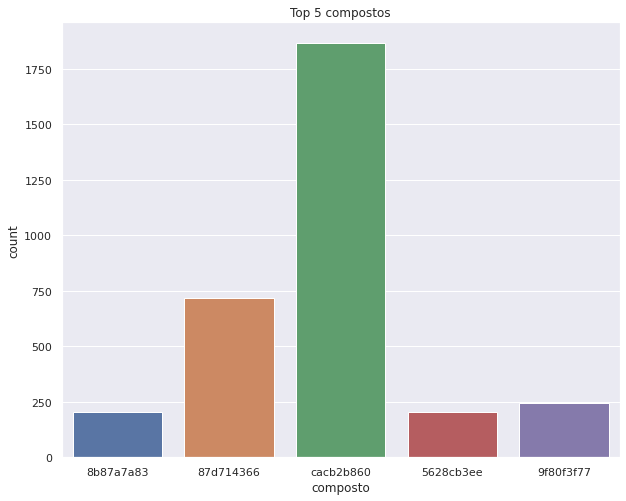

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'))
ax.set_title('Top 5 compostos')
plt.show()

Até o momento analisamos os dados de tempo, dose, compostos e afins. Entretanto, não analisamos os dados de expressões gênicas (G's) e viabilidade celular (C's). Será que podemos criar um gráfico de barras para esses dados?
Vamos pensar que a nossa base de dados apresenta mais de 3.000 compostos. Mas quantos desses compostos aparecem na coluna ```g-0```? 
Para responder essa questão, vamos usar a função ```unique()``` do Pandas que conta os valores únicos presentes na coluna em questão. Como resposta padrão, o retorno será uma lista com arrays (os nomes dos compostos) mas, nosso objetivo é saber o tamanho dessa lista e, por isso, usamos o ```len```, pois assim, ele contará o tamanho desta lista de arrays.

In [9]:
len(dados['g-0'].unique())

14367

Como temos diversos compostos únicos dentro da coluna ```g-0```, não é viável que façamos o mesmo gráfico utilizado anteriormente. 
Por isso, precisamos traçar uma nova estratégia para visualizar os nossos dadose aqui, usaremos um histograma.
O primeiro passo, é identificar qual o valor mínimo (```min()```) e o valor máximo (```max()```) para entender qual o intervalo númerico com o qual estamos trabalhando.

In [10]:
dados['g-0'].min()

-5.513

In [11]:
dados['g-0'].max()

10.0

Depois que reconhecemos que o nosso intervalo vai de ~5,5 a 10,0, podemos partir para o histograma e a função que usaremos para plotar é do Pandas (```dataframe['variável'].hist()```).
Assim que rodamos essa função, percebemos que a visualização destes dados ainda não está boa pois, a divisão padrão das barras do histograma, representam intervalos muito grandes que atrapalham o entendimento dos dados.
Por isso, acresentamos um parâmetro dentro da função ```(bins = número de quebras)``` para melhor dividir e, consequentemente visualizar os dados.
Quando definimos os bins em 100, podemos perceber que a forma se aproxima bastante de uma curva bastante conhecida: a curva normal.

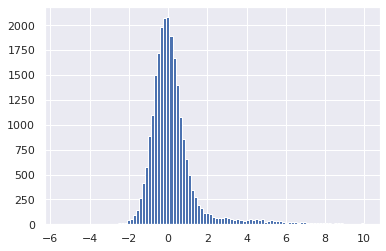

In [12]:
dados['g-0'].hist(bins = 100)

Aqui, estamos testando o mesmo histograma para outro gene, o ```g-19```. E queremos fazer uma comparação entre os gráficos e podemos fazer algumas considerações sobre ambos os gráficos.
Percebemos, por exemplo, que a imagem seguem a mesma tendência de curva mas há um deslocamento para a direita.

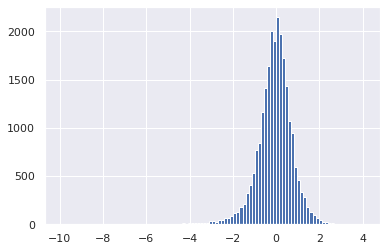

In [13]:
dados['g-19'].hist(bins = 100)

Como concluimos que plotar os gráficos de todos os genes é inviável, vamos analisar resumidamente algumas estatísticas sobre eles. 
Para isso, vamos usar a função ```describe``` do Pandas que já calcula e descreve algumas estatísticas importantes para o entendimento dos dados (contagem, média, desvio padrão, mínimo, alguns quartis e máximo).


In [14]:
dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

Neste ponto, vamos separar as variáveis que queremos analisar da base de dados (exemplo: ```g-0``` e ```g-1```) através de uma lista de arrays.
Entretanto, apesar desta ser uma ótima estratégia para a separação, temos 771 genes e escrevê-los um a um seria muito trabalhoso e podemos fazer de uma outra forma.

In [15]:
dados[['g-0', 'g-1']]

,g-0,g-1
0,1.0620,0.5577
1,0.0743,0.4087
2,0.6280,0.5817
3,-0.5138,-0.2491
4,-0.3254,-0.4009
...,...,...
23809,0.1394,-0.0636
23810,-1.3260,0.3478
23811,0.3942,0.3756
23812,0.6660,0.2324


Uma estratégia mais direta em que não precisaremos escrever a lista gene a gene, é o uso da função ```loc[]``` do Pandas.
Como argumentos, passamos primeiramente o ```:```, os dois pontos faz com que o ```loc[]```retorne todos os elementos de uma determinada coluna, isso é importante quando não sabemos qual a quantidade de linhas de um dataframe. E, o segundo elemento, passamos as colunas que são de nosso interesse. No caso, queremos que a função nos retorne todos os elementos das colunas ```g-0```até ```g-771```.
E, por fim, podemos declarar a nossa função de interesse a partir deste filtro realizado nos dados, o ```describe()```.

In [16]:
dados.loc[:,'g-0':'g-771'].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

Apesar do describe reunir as nossas estatísticas de interesse, é bastante complexo analisar o dataframe resposta. Para facilitar o nosso entendimento, vamos plotar histogramas que nos ajudaram na visualização das estatísticas de todas as colunas selecionadas.
Olhando o dataframe original, anteriormente, fizemos o histograma de apenas uma coluna. Mas agora, nosso conjunto de dados de interesse é o ```describe()``` que fizemos a partir do ```loc[]``` e, deste ponto de vista, não queremos mais fazer o histograma coluna a coluna (genes), queremos que ele seja a partir das linhas (estatísticas). Por isso, vamos transpor as linhas e colunas (transformar as linhas em colunas e vice-versa).
Para isso, vamos usar o ```.T[]``` no código anterior que produzimos para organizar o ```describe()```.
Ou seja, vamos manter todo o código até o ```describe()``` e, ao final, acrescentaremos o ```.T[]```. Mas, ao rodarmos essa linha, percebemos que temos como devolutiva o mesmo dataframe mas transposto. E, como aqui, nosso interesse é produzir histogramas, acrescentamos como argumento do ```.T[]``` a estatística alvo (```.T['estatística']```) e, por último, acrescentamos o ```.hist(bins = número de quebras)``` para que o histograma seja observado.



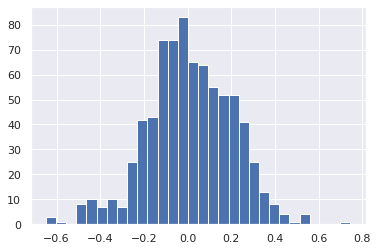

In [17]:
dados.loc[:,'g-0':'g-771'].describe().T['mean'].hist(bins=30)

A seguir, reproduzimos o código acima apenas alterando o parâmetro estatístico a ser analisado (mínimo e máximo, por exemplo). 
E assim, podemos perceber as nuances de cada métrica.

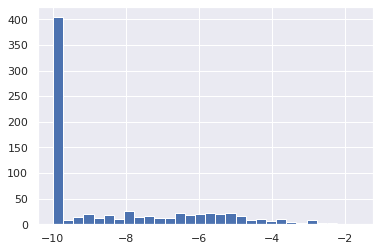

In [18]:
dados.loc[:,'g-0':'g-771'].describe().T['min'].hist(bins=30)

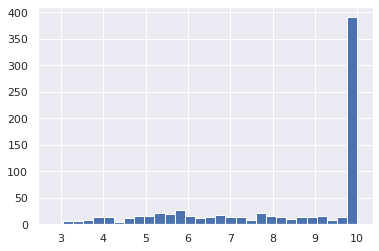

In [19]:
dados.loc[:,'g-0':'g-771'].describe().T['max'].hist(bins=30)

É muito interessante que a gente replique a análise desenvolvida para os ```genes (g)```, nos ```tipos celulares (c)```. 
Por isso, vamos copiar a linha de código que produz os histogramas mas aqui, vamos modificar o argumento ```loc[:,'g-0':'g-771'] -> loc[:,'c-0':'c-99']``` e a quantidade de bins ```hist(bins=100) -> hist(bins=50)```.

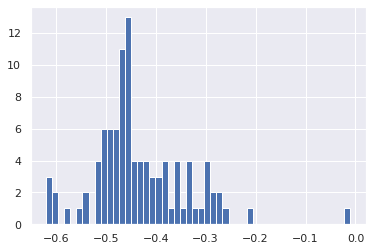

In [20]:
dados.loc[:,'c-0':'c-99'].describe().T['mean'].hist(bins=50)

Um outro tipo de gráfico super interessante e útil é o boxplot. 
Para visualizá-lo, vamos usar a função ```boxplot```do Seaborn e, como argumentos dessa função vamos passar um ```x```, onde ```x = coluna que será plotada neste eixo``` e a base de dados ```data = conjunto de dados```.
O boxplot apresenta uma caixa no meio onde podemos identificar a mediana (linha no meio da caixa que é o ponto onde metade dos dados estão na direita e a outra metade para a esquerda), os outliers (pontos acima ou abaixo do eixo principal do gráfico que representam valores discrepantes para mais ou para menos), a maior concentração dos dados (caixa principal que representa onde está a mior parte dos dados - primeiro quartil (25%) e terceiro quartil (75%)) e os máximos e mínimos desconsiderando os outliers (linhas laterais à caixa principal).
O boxplot é uma importante ferramenta na visualização de dados porque em apenas um gráfico, podemos identificar várias métricas estatísticas.

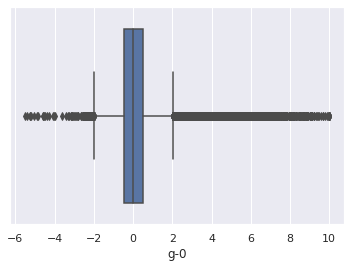

In [21]:
sns.boxplot(x='g-0' , data=dados)

Podemos também, além de definir apenas os dados que irão no eixo x, definimos os dados para o outro eixo, atribuindo um valor para o parâmetro ```y``` (```y = variável que vai ser plotada neste eixo```).
Como podemos perceber, no boxplot que representa o ```tratamento = com_droga``` apresenta muitos outliers e isso gera uma discussão bastante interessante pois, do ponto de vista biológico a investigação desses pontos é importante mas, dependendo da área que estamos trabalhando, esse ponto pode apresentar outras soluções. 
Dito isso, é importante para um cientista de dados não só entender e manipular a base de dados mas também saber acerca do negócio que estamos tratando.

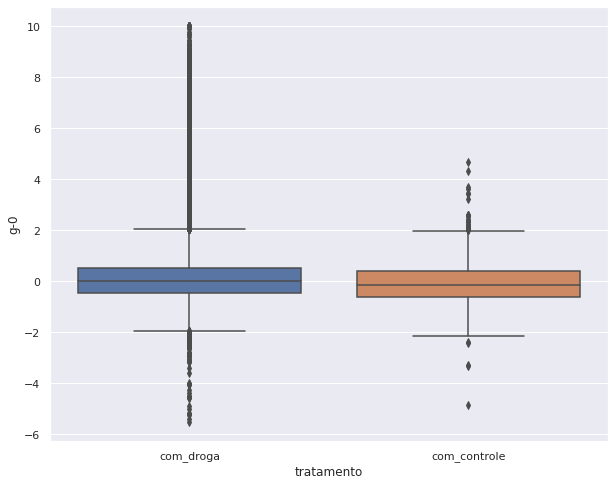

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g-0', x='tratamento' , data=dados)

# **Desafios - Aula 2**

## **Desafio 01: Ordenar o gráfico countplot**

In [23]:
top_compostos = dados.query('composto in @cod_compostos')
top_compostos

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775

In [24]:
contagem_top_compostos = top_compostos['composto'].value_counts().to_frame()
contagem_top_compostos

,composto
cacb2b860,1866
87d714366,718
9f80f3f77,246
8b87a7a83,203
5628cb3ee,202


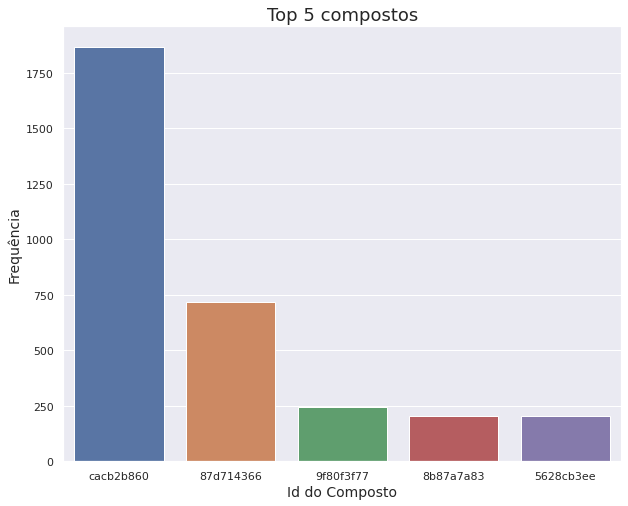

In [25]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x = 'composto', data=top_compostos, order = contagem_top_compostos.index)
ax.set_title('Top 5 compostos', fontsize = 18)
ax.set_xlabel('Id do Composto', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
plt.show()

## **Desafio 02: Melhorar a visualização alterando tamanho da fonte...**

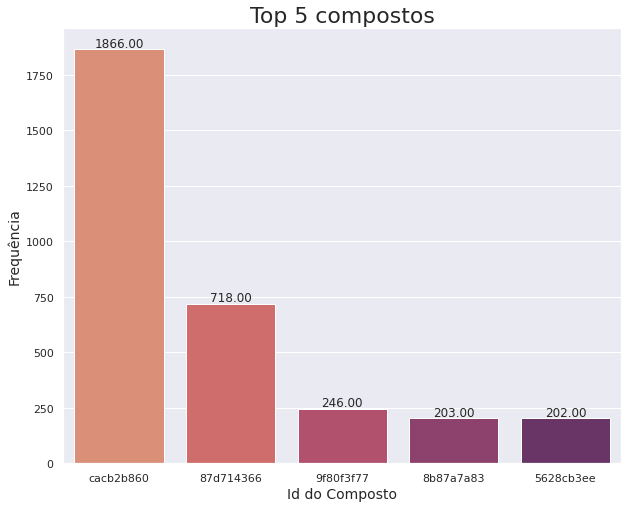

In [26]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x = 'composto',
                   data=dados.query('composto in @cod_compostos'),
                   order = contagem_top_compostos.index,
                   palette="flare")
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 10, '{:1.2f}'.format(height),
          ha = 'center')
ax.set_title('Top 5 compostos', fontsize = 22)
ax.set_xlabel('Id do Composto', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 14)
plt.show()

## **Desafio 03: Plotar os histogramas com seaborn**

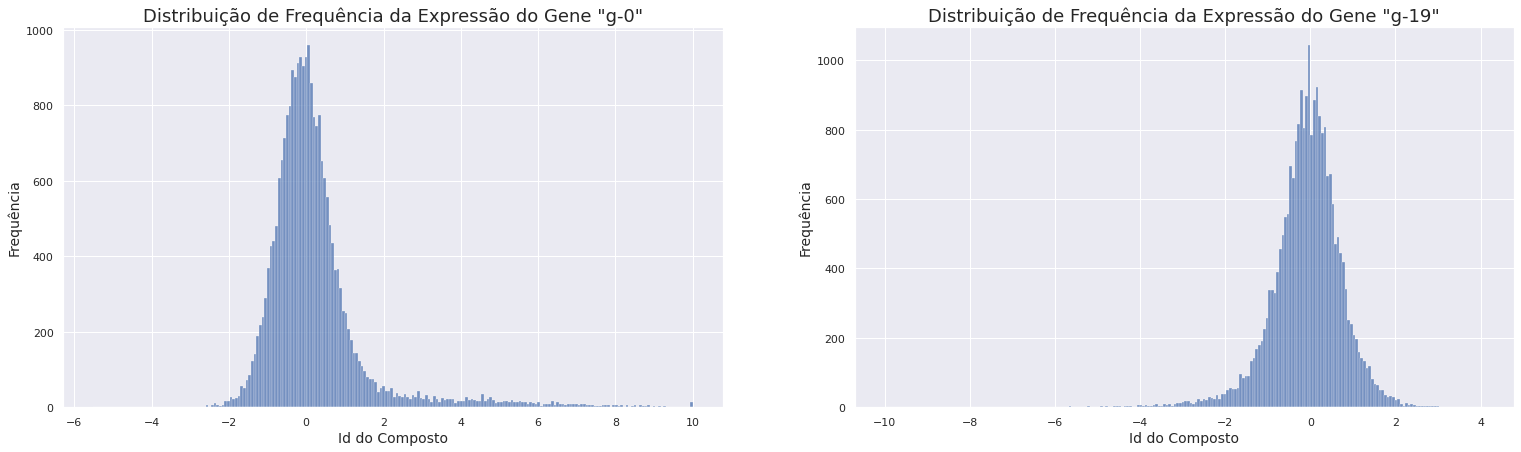

In [27]:
# Criação do Canva:
fig, axs = plt.subplots(figsize = (26, 7), ncols = 2)

#Plot do Gene 'g-0':
ax1 = sns.histplot(data = dados['g-0'], ax = axs[0])
ax1.set_title('Distribuição de Frequência da Expressão do Gene "g-0"', fontsize = 18)
ax1.set_xlabel('Id do Composto', fontsize = 14)
ax1.set_ylabel('Frequência', fontsize = 14)

#Plot do Gene 'g-19':
ax2 = sns.histplot(data = dados['g-19'], ax = axs[1])
ax2.set_title('Distribuição de Frequência da Expressão do Gene "g-19"', fontsize = 18)
ax2.set_xlabel('Id do Composto', fontsize = 14)
ax2.set_ylabel('Frequência', fontsize = 14)

plt.show()

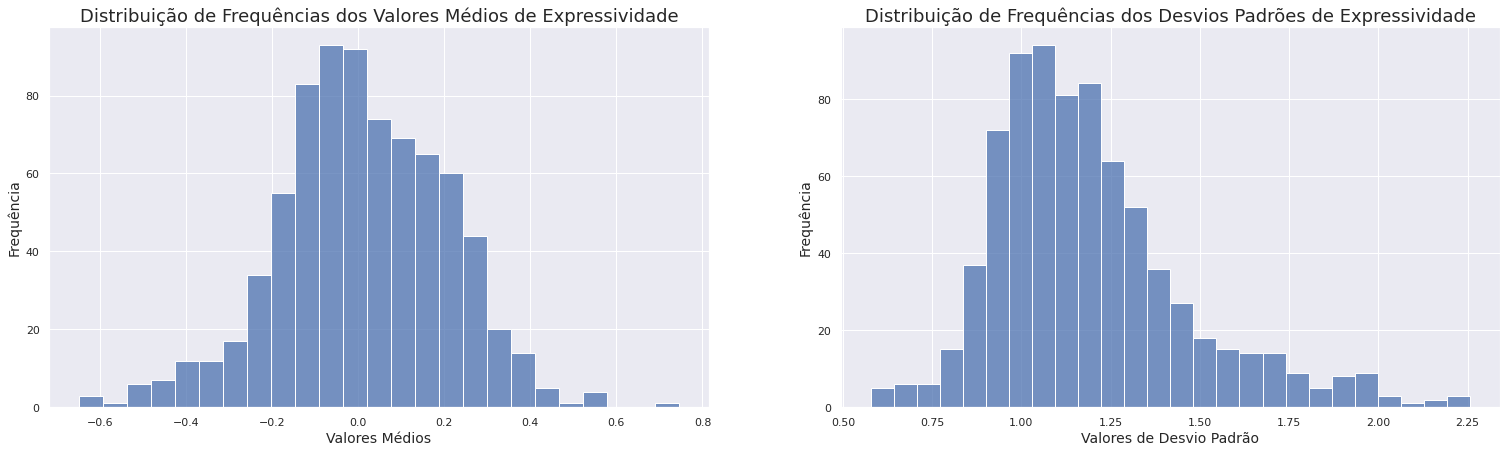

In [28]:
# Criação do Canva:
fig, axs = plt.subplots(figsize = (26, 7), ncols = 2)

#Plot das Médias:
ax1 = sns.histplot(data = dados.loc[:,'g-0':'g-771'].describe().T['mean'], ax = axs[0])
ax1.set_title('Distribuição de Frequências dos Valores Médios de Expressividade', fontsize = 18)
ax1.set_xlabel('Valores Médios', fontsize = 14)
ax1.set_ylabel('Frequência', fontsize = 14)

#Plot dos Desvios Padrões:
ax2 = sns.histplot(data = dados.loc[:,'g-0':'g-771'].describe().T['std'], ax = axs[1])
ax2.set_title('Distribuição de Frequências dos Desvios Padrões de Expressividade', fontsize = 18)
ax2.set_xlabel('Valores de Desvio Padrão', fontsize = 14)
ax2.set_ylabel('Frequência', fontsize = 14)

plt.show()

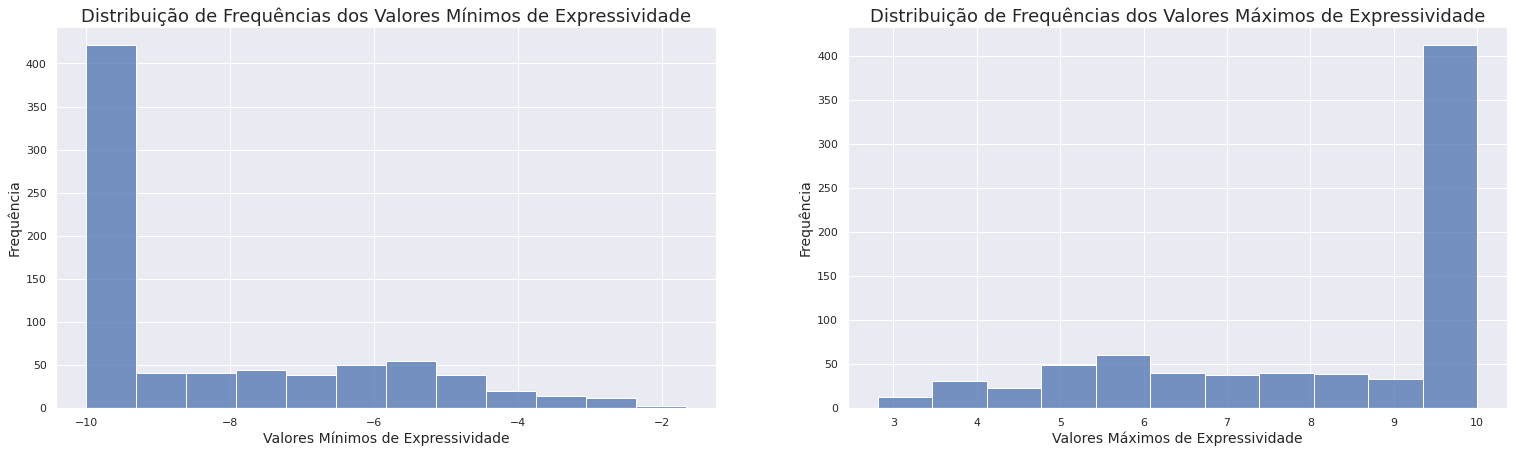

In [29]:
# Criação do Canva:
fig, axs = plt.subplots(figsize = (26, 7), ncols = 2)

#Plot dos Valores Mínimos:
ax1 = sns.histplot(data = dados.loc[:,'g-0':'g-771'].describe().T['min'], ax = axs[0])
ax1.set_title('Distribuição de Frequências dos Valores Mínimos de Expressividade', fontsize = 18)
ax1.set_xlabel('Valores Mínimos de Expressividade', fontsize = 14)
ax1.set_ylabel('Frequência', fontsize = 14)

#Plot dos Valores Máximos:
ax2 = sns.histplot(data = dados.loc[:,'g-0':'g-771'].describe().T['max'], ax = axs[1])
ax2.set_title('Distribuição de Frequências dos Valores Máximos de Expressividade', fontsize = 18)
ax2.set_xlabel('Valores Máximos de Expressividade', fontsize = 14)
ax2.set_ylabel('Frequência', fontsize = 14)

plt.show()

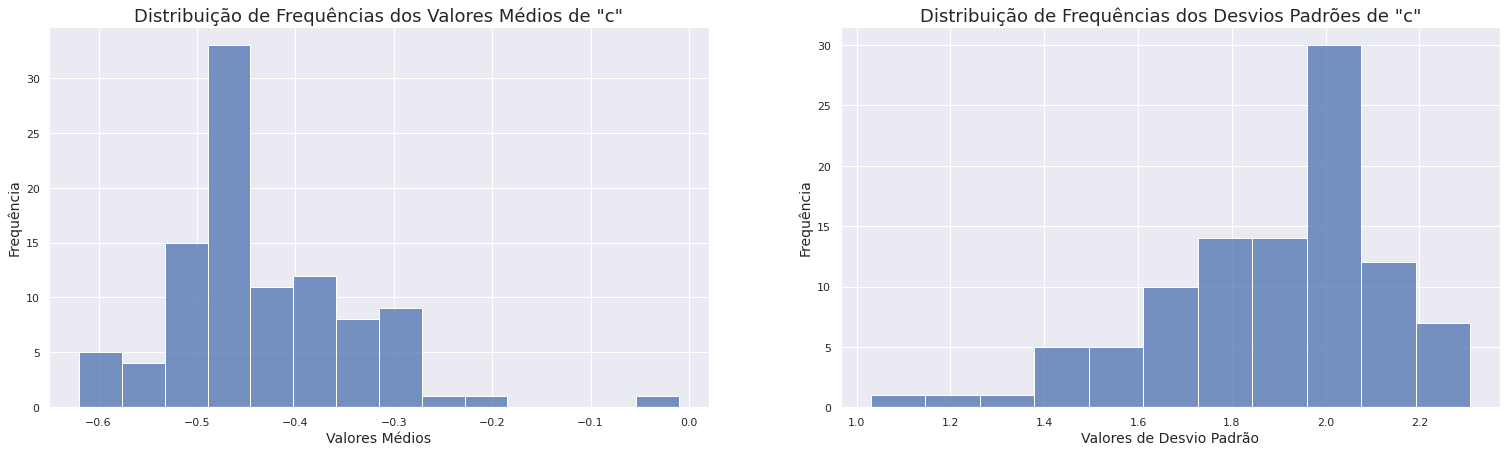

In [30]:
# Criação do Canva:
fig, axs = plt.subplots(figsize = (26, 7), ncols = 2)

#Plot das Médias:
ax1 = sns.histplot(data = dados.loc[:,'c-0':'c-99'].describe().T['mean'], ax = axs[0])
ax1.set_title('Distribuição de Frequências dos Valores Médios de "c"', fontsize = 18)
ax1.set_xlabel('Valores Médios', fontsize = 14)
ax1.set_ylabel('Frequência', fontsize = 14)

#Plot dos Desvios Padrões:
ax2 = sns.histplot(data = dados.loc[:,'c-0':'c-99'].describe().T['std'], ax = axs[1])
ax2.set_title('Distribuição de Frequências dos Desvios Padrões de "c"', fontsize = 18)
ax2.set_xlabel('Valores de Desvio Padrão', fontsize = 14)
ax2.set_ylabel('Frequência', fontsize = 14)

plt.show()

## **Desafio 04: Estudar sobre as estatíticas retornadas no .describe()**

In [31]:
dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

A função ``` .describe() ``` fornecida pelo Pandas permite a análise dos seguintes parâmetros estatísticos: **Valor total**, **Média**, **Mediana**, **Desvio Padrão**, **Valor Mínimo**, **Valor Máximo** e os **Quartis**. Ou seja a função permite a análise de **Variáveis de Tendência Central**, como também a análise de **Medidas Separatrizes** e **Medidas de Dispersão**.
***



### **Medidas de Tendência Central:**
***

#### <font color=green>**Média**</font>
https://pt.wikipedia.org/wiki/M%C3%A9dia#Defini%C3%A7%C3%A3o_formal

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

#$$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

***

#### <font color=green>**Médiana**</font>
https://pt.wikipedia.org/wiki/Mediana_(estat%C3%ADstica)

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$


### **Medidas Separatrizes:**
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

#### <font color=green>**Quartis**</font>

https://pt.wikipedia.org/wiki/Quartil

Assim, no caso duma amostra ordenada:

*   primeiro quartil (designado por Q1/4) = quartil inferior = é o valor aos 25% da amostra ordenada = 25º percentil
*   segundo quartil (designado por Q2/4) = mediana = é o valor até ao qual se encontra 50% da amostra ordenada = 50º percentil, ou 5º decil.
*   terceiro quartil (designado por Q3/4) = quartil superior = valor a partir do qual se encontram 25% dos valores mais elevados = valor aos 75% da amostra ordenada = 75º percentil
<p><strong>À diferença entre os quartis superior e inferior chama-se amplitude inter-quartil.</strong></p>
<img = alt="Colaboratory logo" src="https://s3.amazonaws.com/caelum-online-public/856-introducao-python-pandas/09/compressed_box-plot.png">


### **Medidas de Dispersão**
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

#### <font color=green>**Desvio Padrão**</font>

https://pt.wikipedia.org/wiki/Desvio_padr%C3%A3o

<p>Em probabilidade, o desvio padrão ou desvio padrão populacional (comumente representado pela letra grega sigma) é uma medida de dispersão em torno da média populacional de uma variável aleatória.</p> 

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

<p>O termo possui também uma acepção específica no campo da estatística, na qual também é chamado de desvio padrão amostral (comumente representado pela letra latina s) e indica uma medida de dispersão dos dados em torno de média amostral. Um baixo desvio padrão indica que os pontos dos dados tendem a estar próximos da média ou do valor esperado.Um alto desvio padrão indica que os pontos dos dados estão espalhados por uma ampla gama de valores.</p> 

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

<p>O desvio padrão populacional ou amostral é a raiz quadrada da variância populacional ou amostral correspondente, de modo a ser uma medida de dispersão que seja um número não negativo e que use a mesma unidade de medida dos dados fornecidos.</p>

## **Desafio 05: Refletir sobre a manipulação do tamanho das visualizações**

### 'Por que ocorreu a distorção?', 'O gráfico estava realmente distorcido?', 'O que realmente significa um gráfico distorcido?'
***

<p>A 'distorção' mencionada ocorre principalmente pela grande amplitude dos dados, principalmente aqueles distantes das medidas de tendência central (<em>outliers</em>). Ou seja análisar essa base de dados, com uma grande amplitude torna necessária uma grande área para a melhor visualização desses dados.</p>
<p>Isso entretanto não classificaria necessáriamente uma distorção. Um gráfico distorcido na realidade, como aponta a autora do livro <strong>'<em>Storytelling</em> with data' - Cole Nussbaumer Knaflic</strong>, é um gráfico que sugere uma interpretação diferente do que os dados realmente indicam, o que induz a pessoa ao erro ou a uma interpretação equivocada como indicado no exemplo abaixo. No qual a escala dos eixos foi alterada para gerar uma impressão errada ao telespectador.</p>
<img src = 'https://flowingdata.com/wp-content/uploads/2012/08/Bush-cuts.png'>

## **Desafio 06: Fazer outras análises com o boxplot e até com o histograma** 

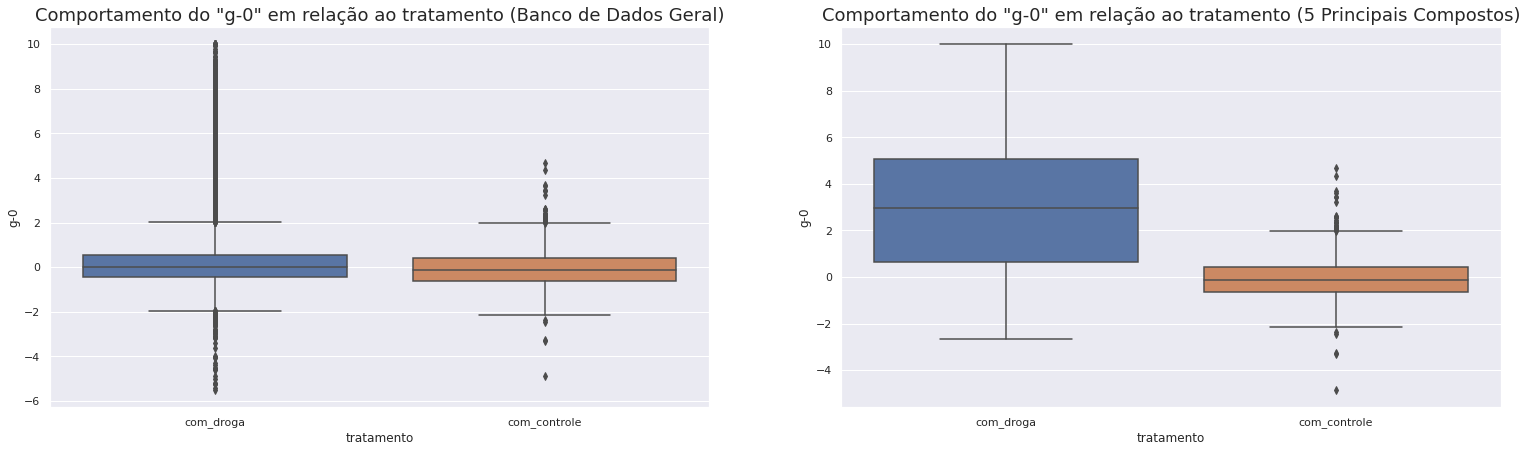

In [37]:
# Criação do Canva:
fig, axs = plt.subplots(figsize = (26, 7), ncols = 2)

#Box Plot aplicado ao banco de dados Gerais:
ax1 = sns.boxplot(y='g-0', x='tratamento' , data=dados, ax = axs[0])
ax1.set_title('Comportamento do "g-0" em relação ao tratamento (Banco de Dados Geral)', fontsize = 18)

#Box Plot aplicado aos cinco principais compostos:
ax1 = sns.boxplot(y='g-0', x='tratamento' , data=top_compostos, ax = axs[1])
ax1.set_title('Comportamento do "g-0" em relação ao tratamento (5 Principais Compostos)', fontsize = 18)

plt.show()

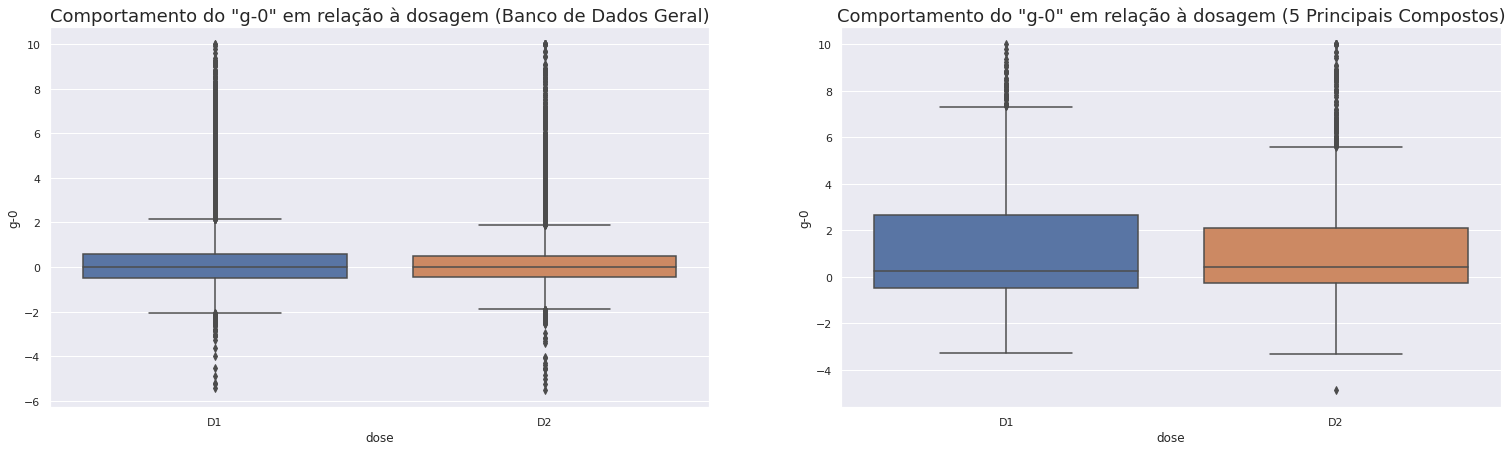

In [38]:
# Criação do Canva:
fig, axs = plt.subplots(figsize = (26, 7), ncols = 2)

#Box Plot aplicado ao banco de dados Gerais:
ax1 = sns.boxplot(y='g-0', x='dose' , data=dados, ax = axs[0])
ax1.set_title('Comportamento do "g-0" em relação à dosagem (Banco de Dados Geral)', fontsize = 18)

#Box Plot aplicado aos cinco principais compostos:
ax1 = sns.boxplot(y='g-0', x='dose' , data=top_compostos, ax = axs[1])
ax1.set_title('Comportamento do "g-0" em relação à dosagem (5 Principais Compostos)', fontsize = 18)

plt.show()

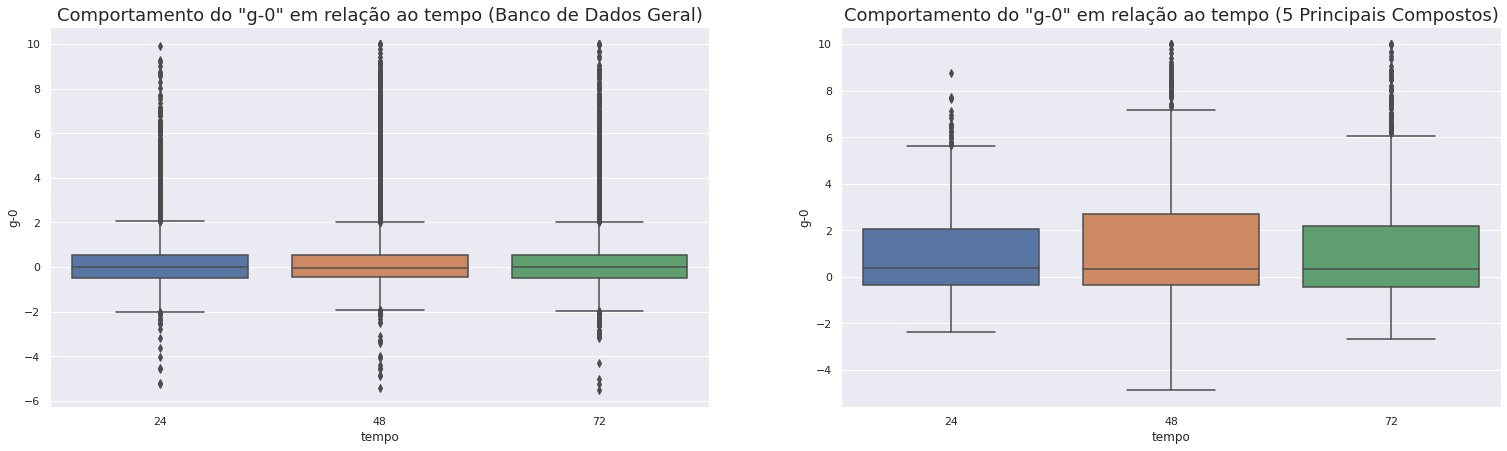

In [39]:
# Criação do Canva:
fig, axs = plt.subplots(figsize = (26, 7), ncols = 2)

#Box Plot aplicado ao banco de dados Gerais:
ax1 = sns.boxplot(y='g-0', x='tempo' , data=dados, ax = axs[0])
ax1.set_title('Comportamento do "g-0" em relação ao tempo (Banco de Dados Geral)', fontsize = 18)

#Box Plot aplicado aos cinco principais compostos:
ax1 = sns.boxplot(y='g-0', x='tempo' , data=top_compostos, ax = axs[1])
ax1.set_title('Comportamento do "g-0" em relação ao tempo (5 Principais Compostos)', fontsize = 18)

plt.show()

## **Desafio 07: Resumo do que você aprendeu com os dados**

Nessa análise dos dados foi possível desenvolver sobre:

*   As impotancias de ter uma boa visualização, e como isso vai além dos efeitos cosméticos.
*   Refletir sobre outros conceitos de visualização como distorção de dados e melhora de representatividade.
*   Análisar dentro do banco de dados as medidas de tendência central, medidas separatrizes e medidas de dispersão, fornecidas pelo ```.describe()```
*   Compreensão maior do que se tratam os 'g's e os 'c's e seu comportamento ao longo da distribuição das amostras.

# **Referências**

*    https://cursos.alura.com.br/course/introducao-python-pandas
*    https://cursos.alura.com.br/course/estatistica-distribuicoes-e-medidas
*    https://pt.wikipedia.org/wiki/M%C3%A9dia
*    https://pt.wikipedia.org/wiki/Mediana_(estat%C3%ADstica)
*    https://pt.wikipedia.org/wiki/Quartil
*    https://pt.wikipedia.org/wiki/Desvio_padr%C3%A3o